In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")

In [4]:
df.tail()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235
524163,524163,0.776515,-5.484091,0.023500,0.271189,0.067338,0.339319,0.793487,313870.0566,0.223933,77.45960


In [5]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [6]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [7]:
df.shape

(524164, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [9]:
df.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

/tmp/ipykernel_36/3069919405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.RhythmScore, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

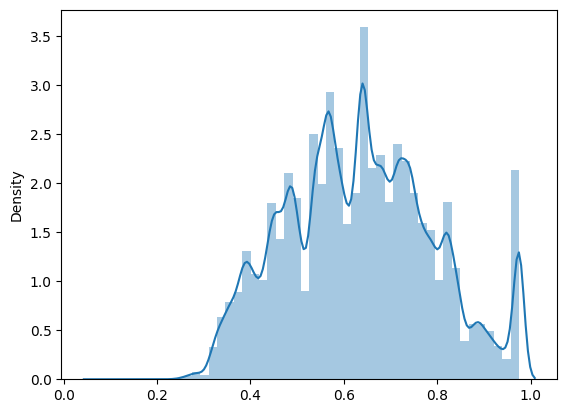

In [10]:
sns.distplot(x = df.RhythmScore, kde=True)

/tmp/ipykernel_36/802034281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.AudioLoudness, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

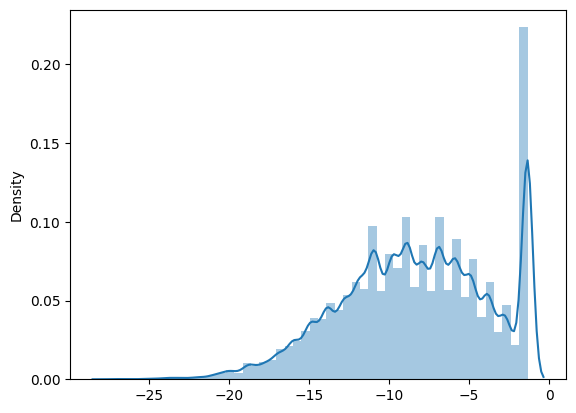

In [11]:
sns.distplot(x = df.AudioLoudness, kde=True)

/tmp/ipykernel_36/343142947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.VocalContent, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

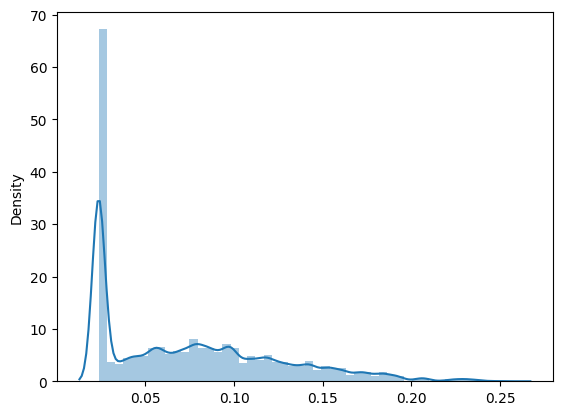

In [12]:
sns.distplot(x = df.VocalContent, kde=True)

/tmp/ipykernel_36/1009972500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.AcousticQuality, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

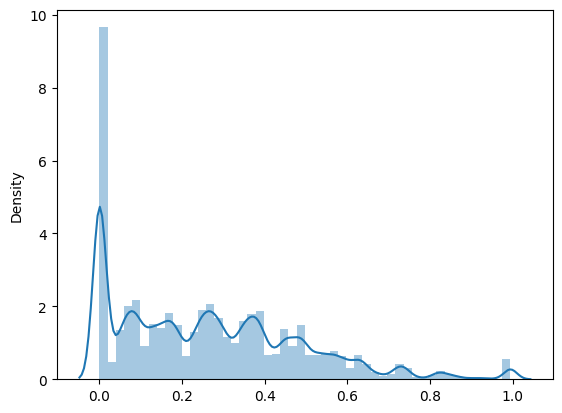

In [13]:
sns.distplot(x = df.AcousticQuality, kde=True)

/tmp/ipykernel_36/1408817971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.LivePerformanceLikelihood, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

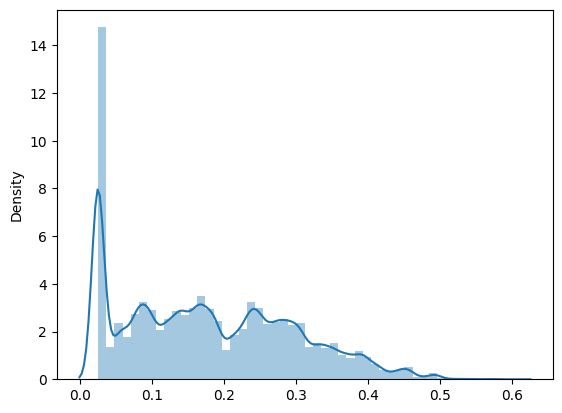

In [14]:
sns.distplot(x = df.LivePerformanceLikelihood, kde=True)

/tmp/ipykernel_36/3488090022.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.MoodScore, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


-0.2688198070468456

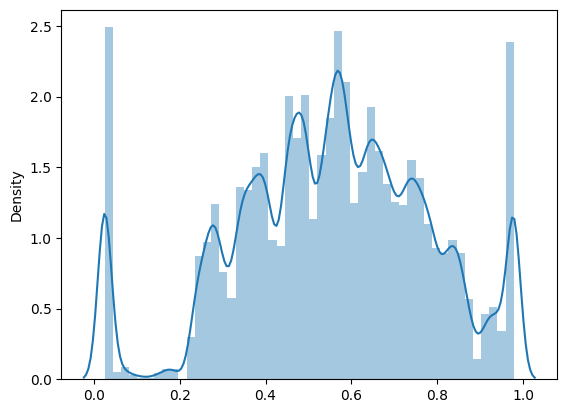

In [15]:
sns.distplot(x = df.MoodScore, kde=True)
df.MoodScore.skew()

/tmp/ipykernel_36/169262562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.BeatsPerMinute, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

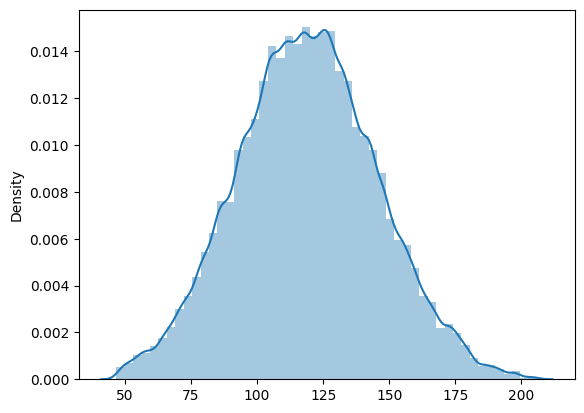

In [16]:
sns.distplot(x = df.BeatsPerMinute, kde=True)

/tmp/ipykernel_36/2383388251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.TrackDurationMs, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

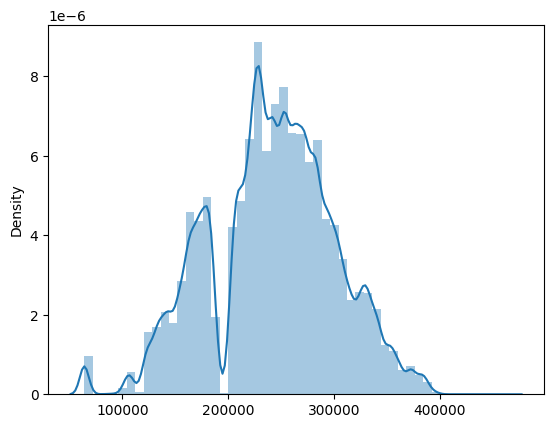

In [17]:
sns.distplot(x = df.TrackDurationMs, kde=True)

/tmp/ipykernel_36/3559217204.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.Energy, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

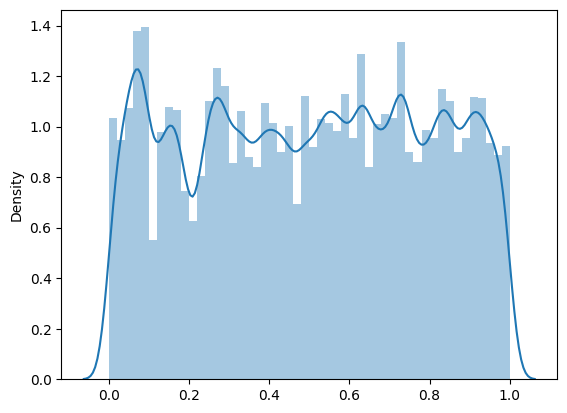

In [18]:
sns.distplot(x = df.Energy, kde=True)


In [19]:
df.duplicated().sum()

0

In [20]:
df.dtypes

id                             int64
RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object

<Axes: xlabel='VocalContent'>

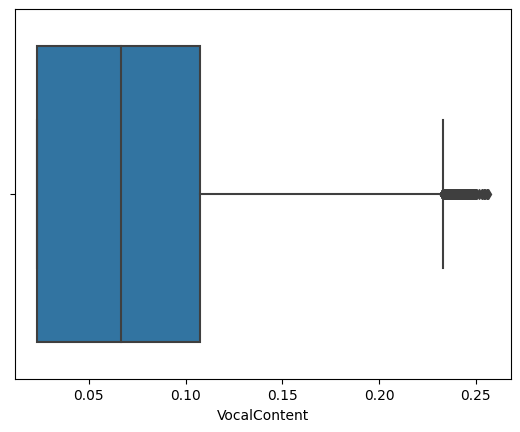

In [21]:
sns.boxplot(x = df.VocalContent)

<Axes: xlabel='Energy'>

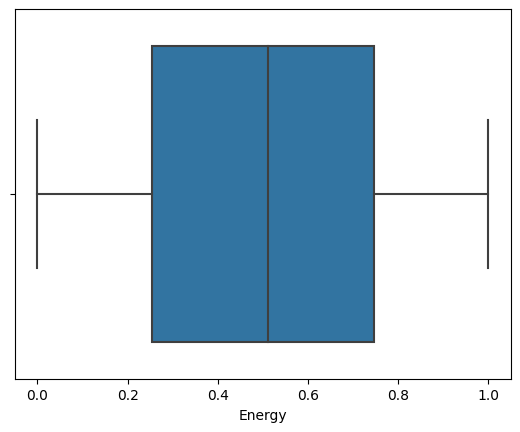

In [22]:
sns.boxplot(x = df.Energy)
# 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
#        'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
#        'TrackDurationMs', '', 'BeatsPerMinute'],

/tmp/ipykernel_36/2026345076.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.AudioLoudness_trans, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.10388277330850333

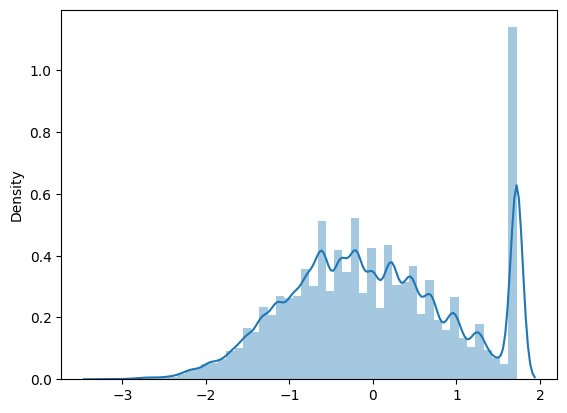

In [23]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[['AudioLoudness_trans']] = pt.fit_transform(df[['AudioLoudness']])

sns.distplot(x = df.AudioLoudness_trans, kde=True)
df.AudioLoudness_trans.skew()

<Axes: xlabel='AudioLoudness'>

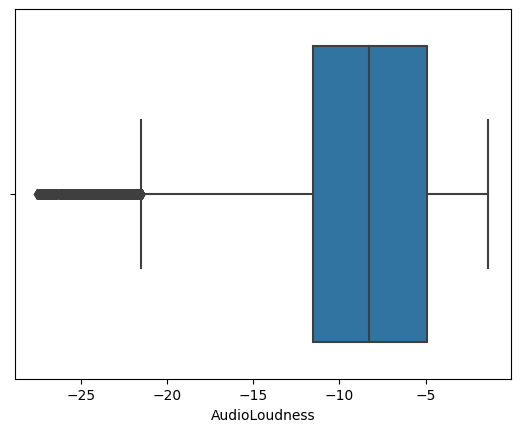

In [24]:
sns.boxplot(x = df.AudioLoudness)
# 'RhythmScore', '', 'VocalContent', 'AcousticQuality',
#        'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
#        'TrackDurationMs', '', 'BeatsPerMinute'],

<Axes: xlabel='AcousticQuality'>

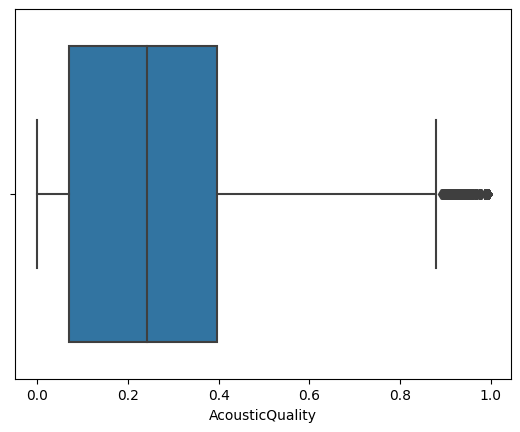

In [25]:
sns.boxplot(x = df.AcousticQuality)
# 'RhythmScore', '', '', '',
#        'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
#        'TrackDurationMs', '', 'BeatsPerMinute'],

<Axes: xlabel='RhythmScore'>

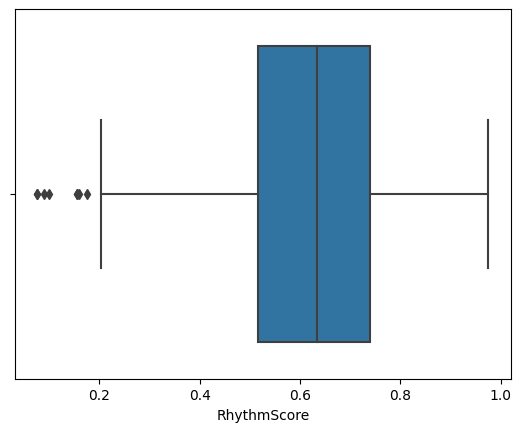

In [26]:
sns.boxplot(x = df.RhythmScore)
# 'RhythmScore', '', '', '',
#        'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
#        'TrackDurationMs', '', 'BeatsPerMinute'],

<Axes: xlabel='InstrumentalScore'>

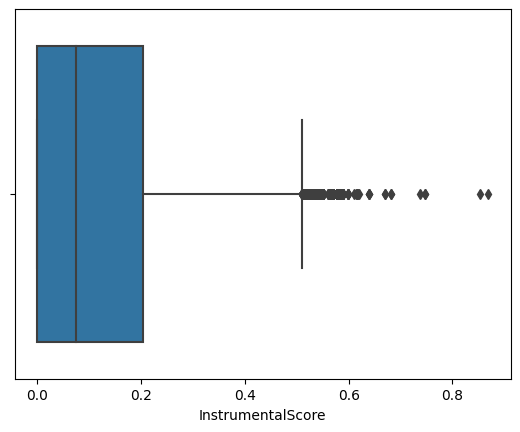

In [27]:
sns.boxplot(x = df.InstrumentalScore)
# '', '', '', '',
#        '', 'LivePerformanceLikelihood', 'MoodScore',
#        'TrackDurationMs', '', 'BeatsPerMinute'],

<Axes: xlabel='TrackDurationMs'>

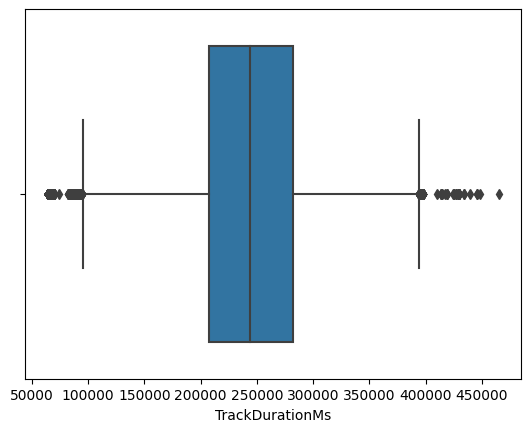

In [28]:
sns.boxplot(x = df.TrackDurationMs)
# '', '', '', '',
#        '', 'LivePerformanceLikelihood', 'MoodScore',
#        '', '', 'BeatsPerMinute'],

<Axes: xlabel='LivePerformanceLikelihood'>

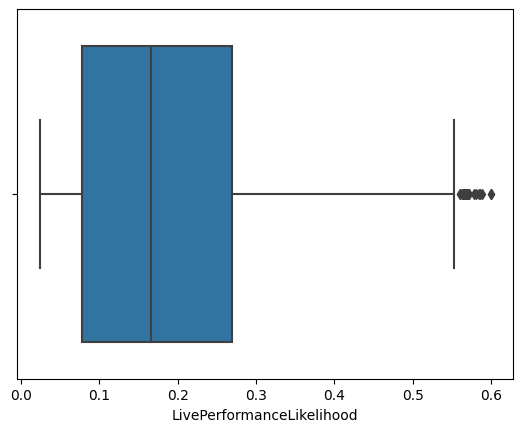

In [29]:
sns.boxplot(x = df.LivePerformanceLikelihood)
# '', '', '', '',
#        '', '', 'MoodScore',
#        '', '', 'BeatsPerMinute'],

<Axes: xlabel='MoodScore'>

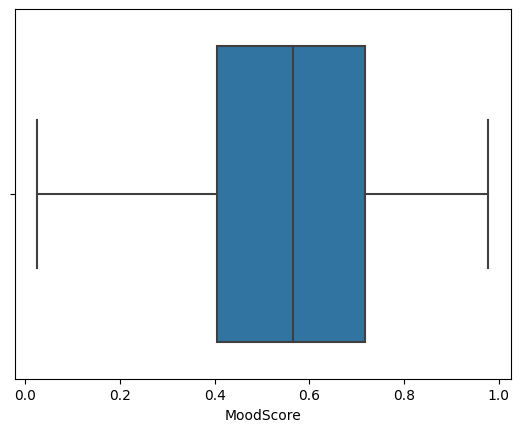

In [30]:
sns.boxplot(x = df.MoodScore)
# '', '', '', '',
#        '', '', '',
#        '', '', 'BeatsPerMinute'],

<Axes: xlabel='BeatsPerMinute'>

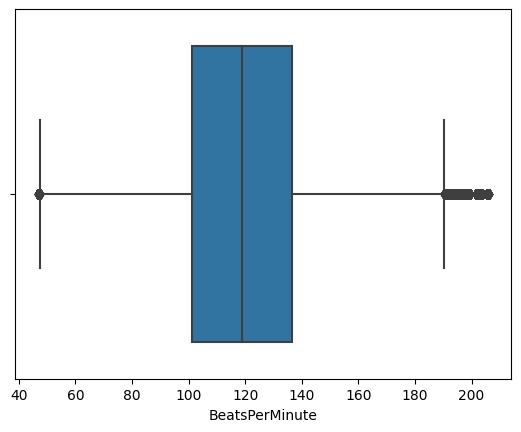

In [31]:
sns.boxplot(x = df.BeatsPerMinute)
# '', '', '', '',
#        '', '', '',
#        '', '', ''],

Lower Limit :  -0.4219021464999999
Upper Limit :  0.8882718334999999


<Axes: xlabel='AcousticQuality'>

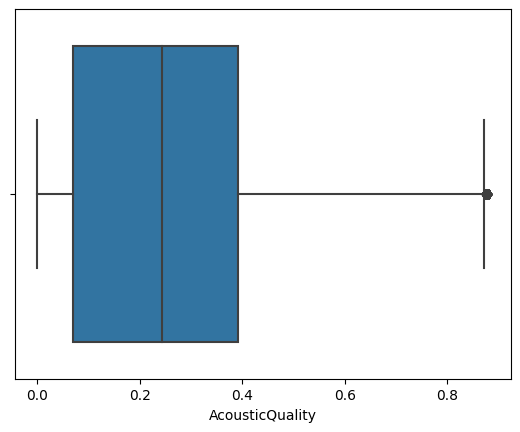

In [32]:
Q1 = df['AcousticQuality'].quantile(0.25)
Q3 = df['AcousticQuality'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ',lower_limit)
print('Upper Limit : ',upper_limit)

df.loc[df['AcousticQuality'] > upper_limit]

df.loc[df['AcousticQuality'] < lower_limit]

df.loc[df['AcousticQuality'] > upper_limit, 'AcousticQuality'] = df['AcousticQuality'].median()

sns.boxplot(x = df.AcousticQuality)

Lower Limit :  -0.412309298875
Upper Limit :  0.872283754125


<Axes: xlabel='AcousticQuality'>

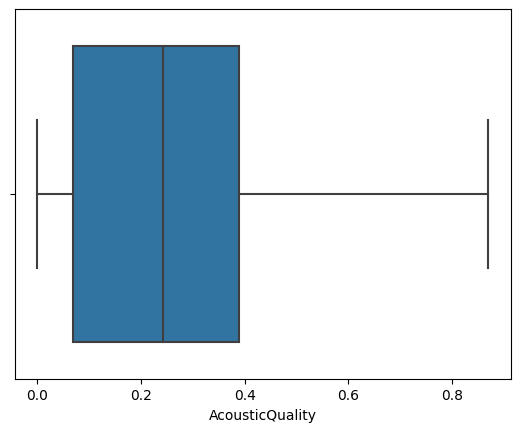

In [33]:
Q1 = df['AcousticQuality'].quantile(0.25)
Q3 = df['AcousticQuality'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ',lower_limit)
print('Upper Limit : ',upper_limit)

df.loc[df['AcousticQuality'] > upper_limit]

df.loc[df['AcousticQuality'] < lower_limit]

df.loc[df['AcousticQuality'] > upper_limit, 'AcousticQuality'] = df['AcousticQuality'].median()

sns.boxplot(x = df.AcousticQuality)

Lower Limit :  -2.8512286079193023
Upper Limit :  2.8110737724107127


<Axes: xlabel='AudioLoudness_trans'>

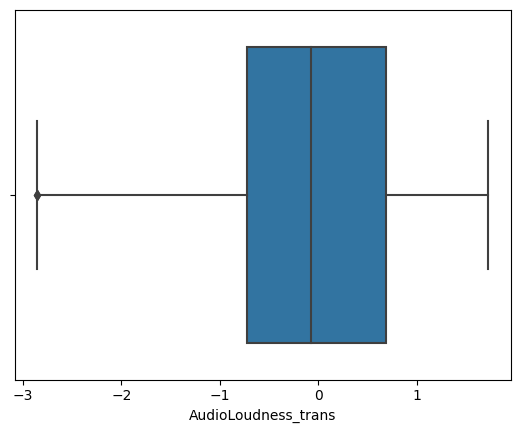

In [34]:
Q1 = df['AudioLoudness_trans'].quantile(0.25)
Q3 = df['AudioLoudness_trans'].quantile(0.75)

IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ',lower_limit)
print('Upper Limit : ',upper_limit)

df.loc[df['AudioLoudness_trans'] > upper_limit]

df.loc[df['AudioLoudness_trans'] < lower_limit]

df.loc[df['AudioLoudness_trans'] > upper_limit, 'AudioLoudness_trans'] = df['AudioLoudness_trans'].median()
df.loc[df['AudioLoudness_trans'] < lower_limit, 'AudioLoudness_trans'] = df['AudioLoudness_trans'].median()


sns.boxplot(x = df.AudioLoudness_trans)

Lower Limit :  0.18085502050000002
Upper Limit :  1.0741737845000001
Empty DataFrame
Columns: [id, RhythmScore, AudioLoudness, VocalContent, AcousticQuality, InstrumentalScore, LivePerformanceLikelihood, MoodScore, TrackDurationMs, Energy, BeatsPerMinute, AudioLoudness_trans]
Index: []
            id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
317326  317326     0.158827      -6.812946      0.023500         0.434630   
368573  368573     0.155926      -6.381575      0.023500         0.044965   
388492  388492     0.155926      -3.538944      0.023500         0.451428   
391345  391345     0.099479     -12.113795      0.023500         0.494568   
404581  404581     0.076900     -16.818981      0.079653         0.000005   
440983  440983     0.174868     -15.037207      0.023500         0.613323   
499041  499041     0.090608     -11.907191      0.023500         0.274945   
515137  515137     0.076900     -12.967227      0.023500         0.000005   

        Instrumenta

<Axes: xlabel='RhythmScore'>

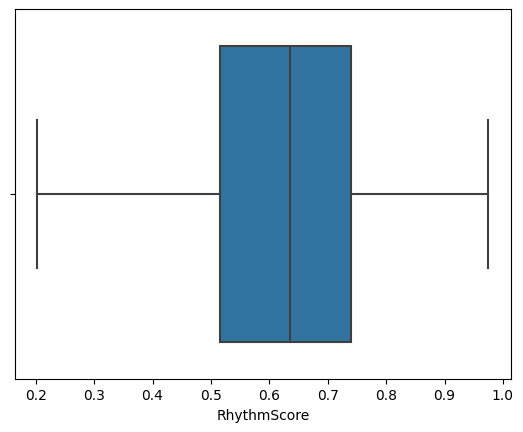

In [35]:
Q1 = df['RhythmScore'].quantile(0.25)
Q3 = df['RhythmScore'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ', lower_limit)
print('Upper Limit : ', upper_limit)

# Find outliers
print(df.loc[df['RhythmScore'] > upper_limit])
print(df.loc[df['RhythmScore'] < lower_limit])

# Replace with median
df.loc[df['RhythmScore'] > upper_limit, 'RhythmScore'] = df['RhythmScore'].median()
df.loc[df['RhythmScore'] < lower_limit, 'RhythmScore'] = df['RhythmScore'].median()


# Boxplot after fixing
sns.boxplot(x = df.RhythmScore)


Lower Limit :  94972.20381249998
Upper Limit :  393979.33131250006
            id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
2879      2879     0.412859     -17.355313      0.023500         0.419951   
4102      4102     0.367566     -12.241702      0.181545         0.000005   
9430      9430     0.783924      -8.351761      0.076031         0.411767   
11416    11416     0.464567      -1.357000      0.164840         0.723991   
12448    12448     0.581095      -8.816420      0.101152         0.412922   
...        ...          ...            ...           ...              ...   
511790  511790     0.848391     -10.919058      0.094434         0.334636   
514123  514123     0.649660      -5.223540      0.048662         0.126695   
514557  514557     0.490181     -11.452423      0.023500         0.000005   
517223  517223     0.427867      -4.606400      0.088770         0.453977   
522640  522640     0.413323      -1.357000      0.071660         0.042560   

        

<Axes: xlabel='TrackDurationMs'>

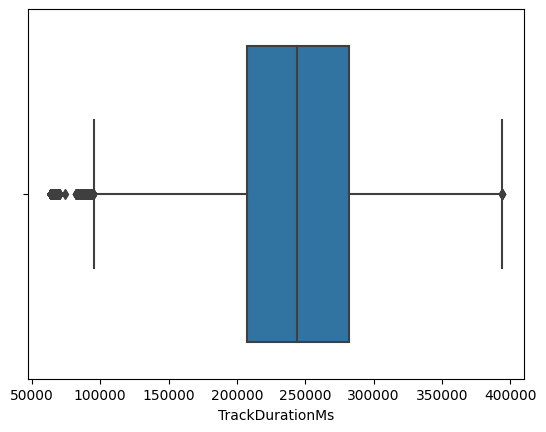

In [36]:
Q1 = df['TrackDurationMs'].quantile(0.25)
Q3 = df['TrackDurationMs'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ', lower_limit)
print('Upper Limit : ', upper_limit)

# Find outliers
print(df.loc[df['TrackDurationMs'] > upper_limit])
print(df.loc[df['TrackDurationMs'] < lower_limit])

# Replace with median
df.loc[df['TrackDurationMs'] > upper_limit, 'TrackDurationMs'] = df['TrackDurationMs'].median()

# Boxplot after fixing
sns.boxplot(x = df.TrackDurationMs)


Lower Limit :  -0.20932657187499998
Upper Limit :  0.555909895125
            id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
4721      4721     0.698830      -4.959029      0.071086         0.000005   
5946      5946     0.606817     -20.790904      0.056633         0.502366   
6324      6324     0.362480     -16.436766      0.023500         0.306660   
6365      6365     0.689928      -6.261824      0.023500         0.222406   
6878      6878     0.723760      -6.967495      0.023500         0.000005   
...        ...          ...            ...           ...              ...   
495337  495337     0.556931      -7.879175      0.023500         0.000005   
496664  496664     0.734947     -14.543172      0.066156         0.068692   
508521  508521     0.633175      -7.554767      0.084989         0.144978   
511621  511621     0.818904     -13.702632      0.090773         0.264535   
520712  520712     0.749167     -15.077281      0.095865         0.377920   

        I

<Axes: xlabel='LivePerformanceLikelihood'>

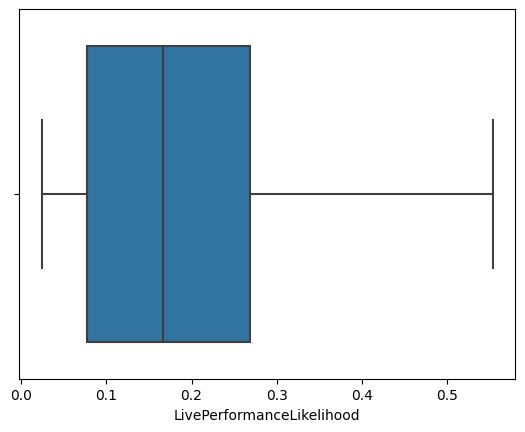

In [37]:
Q1 = df['LivePerformanceLikelihood'].quantile(0.25)
Q3 = df['LivePerformanceLikelihood'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ', lower_limit)
print('Upper Limit : ', upper_limit)

# Find outliers
print(df.loc[df['LivePerformanceLikelihood'] > upper_limit])
print(df.loc[df['LivePerformanceLikelihood'] < lower_limit])

# Replace with median
df.loc[df['LivePerformanceLikelihood'] > upper_limit, 'LivePerformanceLikelihood'] = df['LivePerformanceLikelihood'].median()

# Boxplot after fixing
sns.boxplot(x = df.LivePerformanceLikelihood)


Lower Limit :  47.646139999999995
Upper Limit :  190.11086
            id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
334        334     0.735322     -16.551277      0.023500         0.419693   
556        556     0.803951      -4.715315      0.023500         0.077667   
884        884     0.542485      -1.357000      0.072907         0.111213   
912        912     0.566260      -3.991237      0.023500         0.436416   
1147      1147     0.657827      -1.706428      0.062758         0.000005   
...        ...          ...            ...           ...              ...   
523669  523669     0.774387      -5.750116      0.241693         0.242502   
523914  523914     0.530111      -7.569752      0.171765         0.253737   
524018  524018     0.330830      -6.076607      0.098654         0.490592   
524030  524030     0.391824      -1.929247      0.071313         0.253970   
524101  524101     0.788004      -1.357000      0.023500         0.252230   

        Instrume

<Axes: xlabel='BeatsPerMinute'>

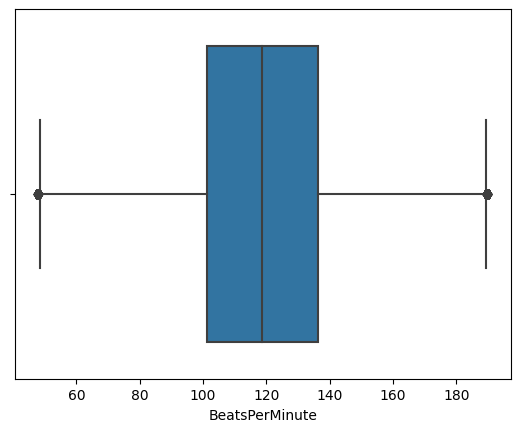

In [38]:
Q1 = df['BeatsPerMinute'].quantile(0.25)
Q3 = df['BeatsPerMinute'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ', lower_limit)
print('Upper Limit : ', upper_limit)

# Find outliers
print(df.loc[df['BeatsPerMinute'] > upper_limit])
print(df.loc[df['BeatsPerMinute'] < lower_limit])

# Replace with median
df.loc[df['BeatsPerMinute'] > upper_limit, 'BeatsPerMinute'] = df['BeatsPerMinute'].median()
df.loc[df['BeatsPerMinute'] < lower_limit, 'BeatsPerMinute'] = df['BeatsPerMinute'].median()

# Boxplot after fixing
sns.boxplot(x = df.BeatsPerMinute)

In [39]:
# df["B/RS"]=(df['MoodScore']/df['RhythmScore'])*df['MoodScore']
df["B/RS1"]=(df['MoodScore']*df['RhythmScore'])/df['RhythmScore'] # it is good dont do chhedkhaani
# df["B/RS2"]=df[('BeatsPerMinute')]*df[('RhythmScore')]
df["log_RhythmScore"] = np.log1p(df["RhythmScore"])

# df = df.drop(columns=["B/RS2"])


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


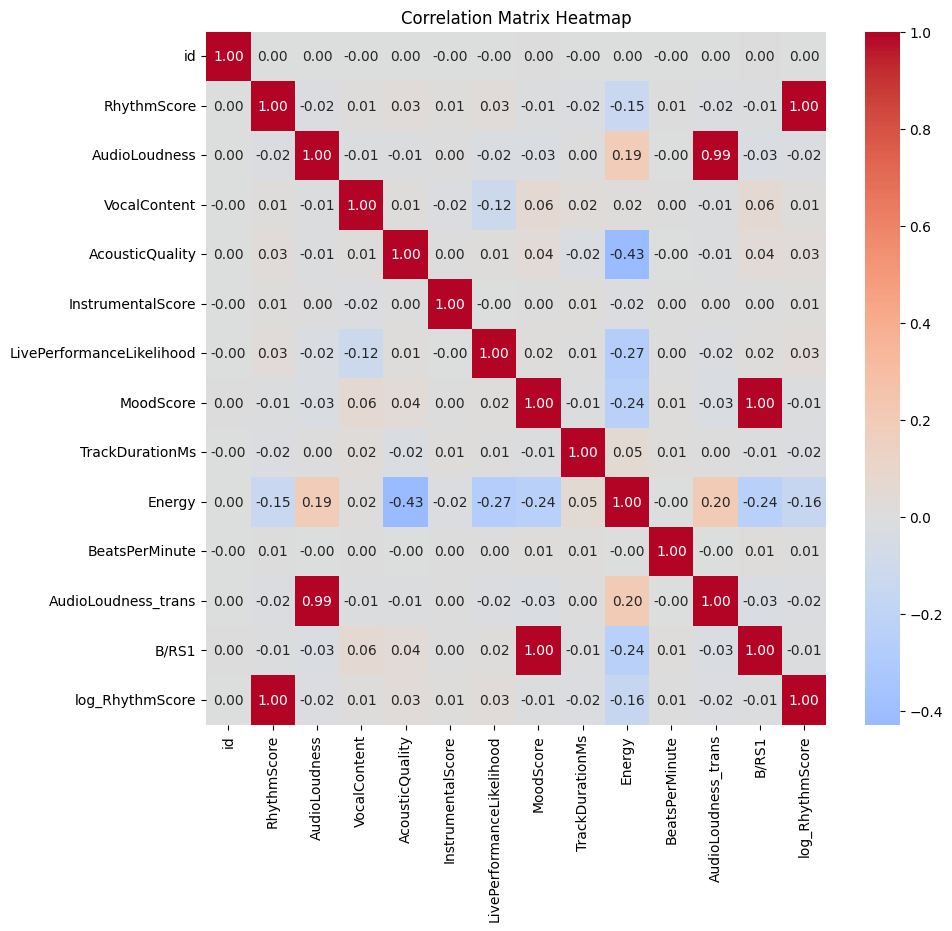

In [40]:
corr = df.corr()

plt.figure(figsize=(10, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [41]:
# X = df.drop(columns=['BeatsPerMinute'])  # features only
# y = df['BeatsPerMinute']                  # target

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [42]:
# test_df = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=42
# )

In [44]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print("R2:", r2_score(y_test, y_pred))
# print("MSE:", mean_squared_error(y_test, y_pred))
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE:", rmse)
# mae = mean_absolute_error(y_test, y_pred)
# print("MAE:", mae)


In [45]:
# from sklearn.tree import DecisionTreeRegressor
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train, y_train)

# # Predictions
# y_pred_dt = dt_model.predict(X_test)

# # Evaluation
# print("R2:", r2_score(y_test, y_pred_dt))
# print("MSE:", mean_squared_error(y_test, y_pred_dt))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
# print("MAE:", mean_absolute_error(y_test, y_pred_dt))

In [46]:
# # X_test_final = test_df.drop(columns=['id'])  # Remove only ID column

# # Apply same scaling if used during training
# X_test_final_scaled = scaler.transform(X_test_final)

# # Step 6: Final predictions
# y_pred = model.predict(X_test_final_scaled)

In [47]:
# # Make predictions on test.csv
# X_test_final = df.drop(columns=["id"])
# y_pred = model.predict(X_test_final)

# # Follow submission format (ID + Prediction only)
# submission = pd.DataFrame({
#     "id": df["id"],   # ID exactly as in test.csv
#     "BeatsPerMinute": y_pred
# })

# # Save to CSV
# submission.to_csv("submission.csv", index=False)
df.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute', 'AudioLoudness_trans',
       'B/RS1', 'log_RhythmScore'],
      dtype='object')

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


test_df = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')
pt = PowerTransformer(method='yeo-johnson')
test_df[['AudioLoudness_trans']] = pt.fit_transform(test_df[['AudioLoudness']])
# test_df["B/RS"]=(test_df['MoodScore']/test_df['RhythmScore'])*test_df['MoodScore']
test_df["B/RS1"]=(test_df['MoodScore']*test_df['RhythmScore'])/test_df['RhythmScore'] # it is good dont do chhedkhaani
# test_df["B/RS2"]=test_df[('BeatsPerMinute')]*test_df[('RhythmScore')]
test_df["log_RhythmScore"] = np.log1p(test_df["RhythmScore"])

# df = df.drop(columns=["AudioLoudness_trans","B/RS","B/RS1","B/RS2"], errors="ignore")

X = df.drop(columns=['BeatsPerMinute', 'id'])  # features only (remove target AND id)
y = df['BeatsPerMinute']                       # target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred_val = model.predict(X_test)
# print("R2:", r2_score(y_test, y_pred_val))
# print("MSE:", mean_squared_error(y_test, y_pred_val))
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_val))
# print("RMSE:", rmse)
# mae = mean_absolute_error(y_test, y_pred_val)
# print("MAE:", mae)
# # df.drop(columns=["AudioLoudness_trans","B/RS","B/RS1"])
# X_test_final = test_df.drop(columns=['id']) 
# X_test_final_scaled = scaler.transform(X_test_final) 


# y_pred_final = model.predict(X_test_final_scaled)

# # Step 9: Create Submission File
# submission = pd.DataFrame({
#     "id": test_df["id"],               # ID from test.csv
#     "BeatsPerMinute": y_pred_final     # Final predictions
# })


# submission.to_csv("submission2.csv", index=False)


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X=df.drop("BeatsPerMinute",axis=1)
y=df["BeatsPerMinute"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=200,        # fewer trees for quick baseline (100–300 later for accuracy)
    max_depth=15,           # limit tree depth (default = unlimited)
    min_samples_split=5,    # stop splitting earlier
    n_jobs=-1,              # use all CPU cores
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest R²:", r2_score(y_test, y_pred))

Random Forest RMSE: 26.008234408844054
Random Forest R²: 0.0003255601904025296


In [61]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize model
xgb_model = XGBRegressor(
    n_estimators=100,     # more trees for better performance (tune later)
    learning_rate=0.05,   # smaller step size for smoother learning
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1             # use all cores
)

# Step 2: Train
xgb_model.fit(X_train, y_train)

# Step 3: Predictions
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.8f}")
print(f"R2 Score: {r2:.4f}")

# Step 5: Predict on test_df (competition submission)
X_test_final = test_df.drop(columns=['id'])   # keep only features
test_preds = xgb_model.predict(X_test_final)

# Create submission file
submission = pd.DataFrame({'id': test_df['id'], 'BeatsPerMinute': test_preds})
submission.to_csv("submission69.csv", index=False)


RMSE: 26.02321830
R2 Score: -0.0008
